In [9]:
from sriApp.modelos.vectorial_model import VectorialModel
from sriApp.modelos.vectorial_model import DIR
from ir_datasets import load
from sriApp.modelos.SortedValueDataSet import normalize
import matplotlib.pyplot as plt
import statistics as stat
import time
import numpy as np

In [10]:
datasets = {
    "beir/arguana": {'count': 8674},
    #"beir/dbpedia-entity": {'count': 4635922},
    "beir/fiqa": {'count': 57638},
    "beir/cqadupstack/android": {'count': 22998},
    "beir/cqadupstack/english": {'count': 40221},
    "beir/cqadupstack/gaming": {'count': 45301},
    "beir/cqadupstack/gis": {'count': 37637},
    "beir/cqadupstack/mathematica": {'count': 16705},
    "beir/cqadupstack/physics": {'count': 38316},
    "beir/cqadupstack/programmers": {'count': 32176},
    "beir/cqadupstack/stats": {'count': 42269},
    "beir/cqadupstack/tex": {'count': 68184},
    "beir/cqadupstack/unix": {'count': 47382},
    "beir/cqadupstack/webmasters": {'count': 17405},
    "beir/cqadupstack/wordpress": {'count': 48605},
    "cranfield": {'count': 1400}
}

In [11]:
dataset_name = "beir/cqadupstack/physics"
vectorial_model = VectorialModel(dataset_name)

CARGADO Modelo Vectorial


In [12]:
dataset = load(dataset_name)
queries=[]
#index=1
for querie in dataset.queries_iter():
    queries.append((querie.text, int(querie.query_id)))
#    index+=1

In [13]:
responses = {}

times = np.zeros(len(queries))
index = 0
for q in queries:
    start = time.time()
    responses[int(q[1])] = list(vectorial_model.SearchResuts(q[0]))    
    end = time.time()
    times[index] = end-start
    index += 0


0.0027098990725828434 0.08730754833897007


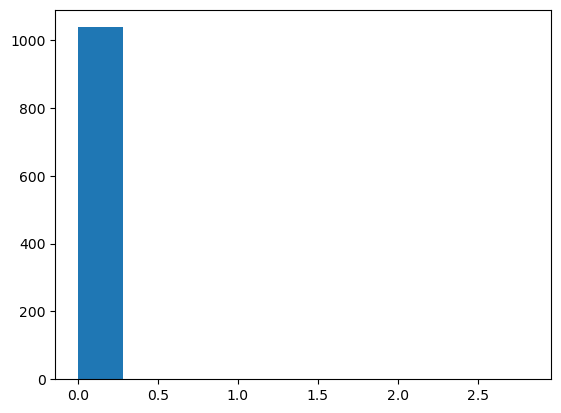

In [14]:
plt.hist(times)
print(times.mean(), times.std())

In [15]:
new_qrels = {}
for qrel in dataset.qrels_iter():
    if qrel.relevance > 0:
        s = new_qrels.get(int(qrel.query_id), set())
        s.add(int(qrel.doc_id))
        new_qrels[int(qrel.query_id)] = s

In [16]:
from medidas import *

In [17]:
responses_0 = responses_umbral(responses, 0.0)
responses_1 = responses_umbral(responses, 0.1)
responses_2 = responses_umbral(responses, 0.2)
responses_3 = responses_umbral(responses, 0.3)
responses_4 = responses_umbral(responses, 0.4)
responses_r25 = responses_r(responses, 25)
responses_r50 = responses_r(responses, 50)
responses_r75 = responses_r(responses, 75)
responses_r100 = responses_r(responses, 100)

In [18]:
m_0    = get_medidas(responses_0, new_qrels)
m_1    = get_medidas(responses_1, new_qrels)
m_2    = get_medidas(responses_2, new_qrels)
m_3    = get_medidas(responses_3, new_qrels)
m_4    = get_medidas(responses_4, new_qrels)
m_r25  = get_medidas(responses_r25, new_qrels)
m_r50  = get_medidas(responses_r50, new_qrels)
m_r75  = get_medidas(responses_r75, new_qrels)
m_r100 = get_medidas(responses_r100, new_qrels)

In [19]:
r_0, a_0 = get_recall_accuracy(m_0)
r_1, a_1 = get_recall_accuracy(m_1)
r_2, a_2 = get_recall_accuracy(m_2)
r_3, a_3 = get_recall_accuracy(m_3)
r_4, a_4 = get_recall_accuracy(m_4)
r_25, a_25 = get_recall_accuracy(m_r25)
r_50, a_50 = get_recall_accuracy(m_r50)
r_75, a_75 = get_recall_accuracy(m_r75)
r_100, a_100 = get_recall_accuracy(m_r100)

0.0714305981630332 1.60453720755821e-05


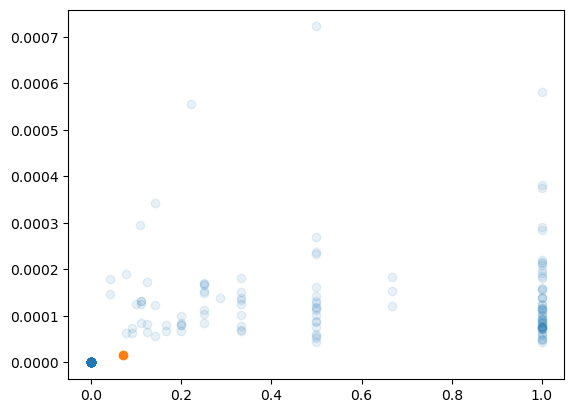

In [20]:
plot_recall_accuracy(r_0,a_0)

0.0714305981630332 1.60453720755821e-05
0.06950567034782627 1.6224164633350273e-05
0.045838107243304546 1.484207273319402e-05
0.020846867815106505 1.3452383701229688e-05
0.012489472884083086 1.4198446870921984e-05
0.0 0.0
0.0 0.0
0.0 0.0
0.0 0.0


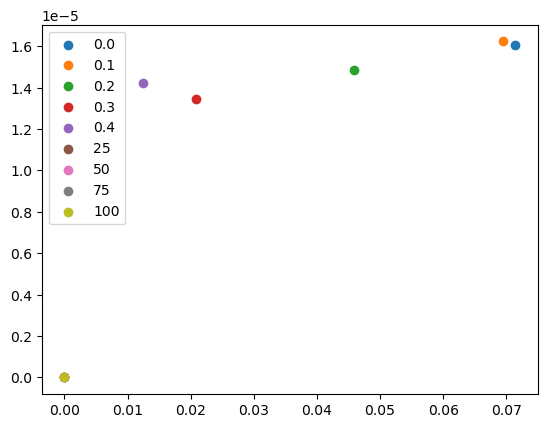

In [21]:
medidas = [
    (r_0, a_0),
    (r_1, a_1),
    (r_2, a_2),
    (r_3, a_3),
    (r_4, a_4),
    (r_25, a_25),
    (r_50, a_50),
    (r_75, a_75),
    (r_100, a_100),
]
names= ['0.0','0.1','0.2','0.3','0.4','25','50','75','100']
plot_means(medidas, names)